# Problem Statement
Data Description:
The data at hand contains medical costs of people characterized by certain attributes.

Domain:
Healthcare

Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

# Learning Outcomes:
- Exploratory Data Analysis

- Practicing statistics using Python

- Hypothesis testing


# Objective:
- We want to see if we can dive deep into this data to find some valuable insights.

# Attribute Information:

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents







**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance


# Task

## 1. Import the necessary libraries (2 marks)
## 2. Read the data as a data frame (2 marks)
## 3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)
     a. Shape of the data (2 marks)
     b. Data type of each attribute (2 marks)
     c. Checking the presence of missing values (3 marks)
     d. 5 point summary of numerical attributes (3 marks)
     e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
     f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
     g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
     h. Distribution of categorical columns (include children) (4 marks)
     i. Pair plot that includes all the columns of the data frame (4 marks)
## 4. Answer the following questions with statistical evidence (28 marks)
     a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)
     b. Does bmi of males differ significantly from that of females? (7 marks)
     c. Is the proportion of smokers significantly different in different genders? (7 marks)
     d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

# 1. Import the necessary libraries (2 marks)

In [1]:
# importing library

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

## 2. Read the data as a data frame (2 marks)

In [2]:
# Reading medical insurance Record 
insuranceDataFrame = pd.read_csv('insurance.csv')
insuranceDataFrame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

### a. Shape of the data (2 marks)

In [3]:
# dimensionality of the DataFrame
insuranceDataFrame.shape

(1338, 7)

### b. Data type of each attribute (2 marks)

In [4]:
insuranceDataFrame.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
insuranceDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### c. Checking the presence of missing values (3 marks)

In [6]:
insuranceDataFrame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# cross verify the missing value using count
insuranceDataFrame.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

**sum of isnull( )** will count of missing values in each attribute its **0** and from **count of isnull( )** we can check the row count are equal to all attribute from the shape of the record. so, from the above output , we can say that **we dont have any missing values** in each attribute

### d. 5 point summary of numerical attributes (3 marks)

In [8]:
insuranceDataFrame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Sex, Smoker and Region are Object(String) so we dont need that

From the Above Output we got the 5 Point summary (Median, 1st Quartile(25%), 3rd Quartile(75%), Min, Max) observation from the record 

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

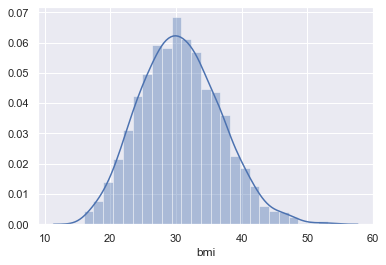

In [9]:
sns.distplot(insuranceDataFrame['bmi'])

bmi looks like normally distributed

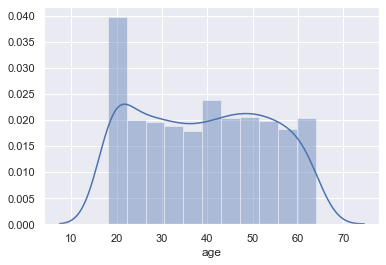

In [10]:
sns.distplot(insuranceDataFrame['age'])

we can see that age is quiet normally distributed

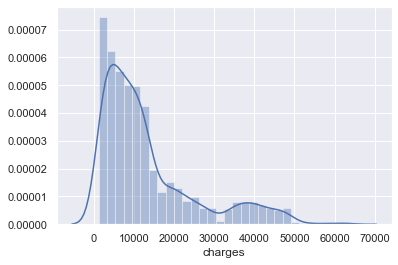

In [11]:
sns.distplot(insuranceDataFrame['charges'])

So from above graph we can see that charges are right skewed as long tail is at right side(mean>median)



### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

In [12]:
# skewness of ‘bmi’, 'age' & 'charges'
bmi_skew , age_skew, charges_skew = insuranceDataFrame['bmi'].skew(), insuranceDataFrame['age'].skew(), insuranceDataFrame['charges'].skew()

print('Skewnessof BMI : ', bmi_skew)
print('Skewnessof AGE : ', age_skew)
print('Skewnessof Charge : ', charges_skew)

Skewnessof BMI :  0.2840471105987448
Skewnessof AGE :  0.05567251565299186
Skewnessof Charge :  1.5158796580240388


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

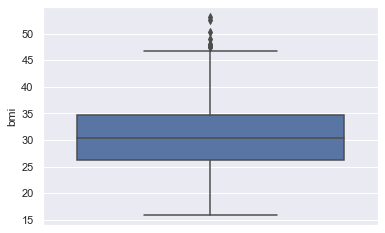

In [13]:
sns.boxplot(x=insuranceDataFrame['bmi'], orient='v')

we can notice that there are multiple outliers presence

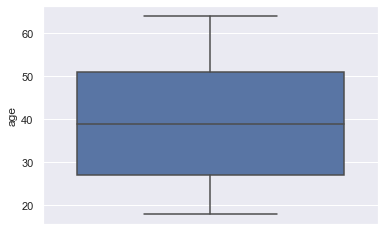

In [14]:
sns.boxplot(x=insuranceDataFrame['age'], orient='v')

we can notice that there are no outliers presence

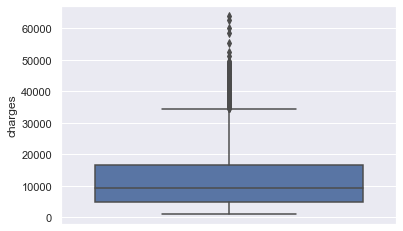

In [15]:
sns.boxplot(x=insuranceDataFrame['charges'], orient='v')

we can notice that there are multiple outliers presence

In [16]:
charge_ind_charge = insuranceDataFrame['charges']
removed_outliers_charges = charge_ind_charge.between(charge_ind_charge.quantile(0.25),charge_ind_charge.quantile(.75))
print(removed_outliers_charges.value_counts())

False    670
True     668
Name: charges, dtype: int64


In [17]:
bmi_ind = insuranceDataFrame['bmi']
removed_outliers_bmi = bmi_ind.between(bmi_ind.quantile(.05),bmi_ind.quantile(.95))
print(removed_outliers_bmi.value_counts())

True     1204
False     134
Name: bmi, dtype: int64


In [18]:
age_ind = insuranceDataFrame['age']
removed_outliers_age = age_ind.between(age_ind.quantile(.05),age_ind.quantile(.95))
print(removed_outliers_age.value_counts())

True     1293
False      45
Name: age, dtype: int64


In [19]:
insuranceDataFrame_o = insuranceDataFrame.copy() # create a copy of original dataFrame 
index_names_age = insuranceDataFrame[~removed_outliers_age].index
index_names_bmi = insuranceDataFrame[~removed_outliers_bmi].index
index_names_charges = insuranceDataFrame[~removed_outliers_charges].index
all_o = list(set().union(index_names_age, index_names_bmi, index_names_charges)) # getting all the outlier patient record
insuranceDataFrame_o.drop(all_o, inplace=True)
print('record before outliers where removed :', insuranceDataFrame.shape)
print('record  after outliers where removed :',insuranceDataFrame_o.shape)

record before outliers where removed : (1338, 7)
record  after outliers where removed : (571, 7)


### h. Distribution of categorical columns (include children) (4 marks)

male      676
female    662
Name: sex, dtype: int64


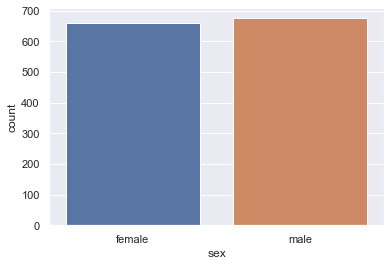

In [20]:
print(insuranceDataFrame['sex'].value_counts())
sns.countplot(x="sex", data=insuranceDataFrame)

With the graph we can notice that  male patients are more when compared to female in the record

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


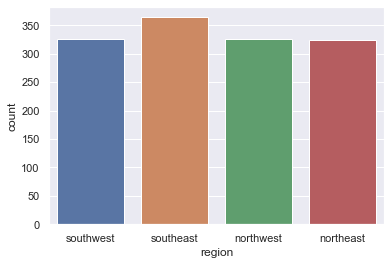

In [21]:
print(insuranceDataFrame['region'].value_counts())
sns.countplot(x="region", data=insuranceDataFrame)

we are able to notice that southwest, northwest have same number of patient record  and southeast have higher number of data compare to all other three region 

no     1064
yes     274
Name: smoker, dtype: int64


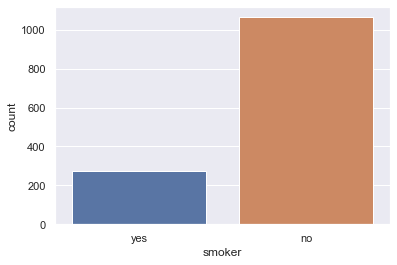

In [22]:
print(insuranceDataFrame['smoker'].value_counts())
sns.countplot(x="smoker", data=insuranceDataFrame)

we can notice that patient in the record are mostly non smokers

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


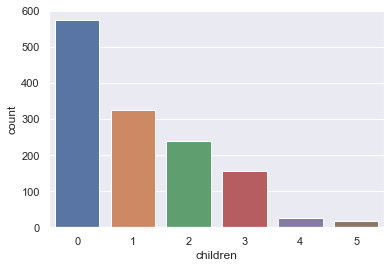

In [23]:
print(insuranceDataFrame['children'].value_counts())
sns.countplot(x="children", data=insuranceDataFrame)

we are able to notice that most are patients are not parents and only few(18 patient) have 5 childrens 

### i. Pair plot that includes all the columns of the data frame (4 marks)

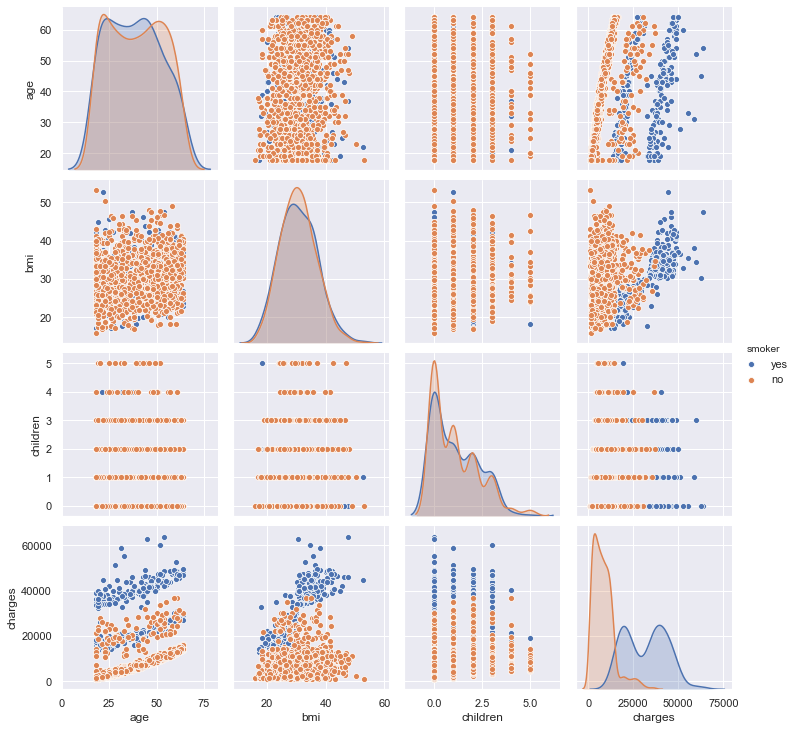

In [24]:
sns.pairplot(insuranceDataFrame,hue='smoker')

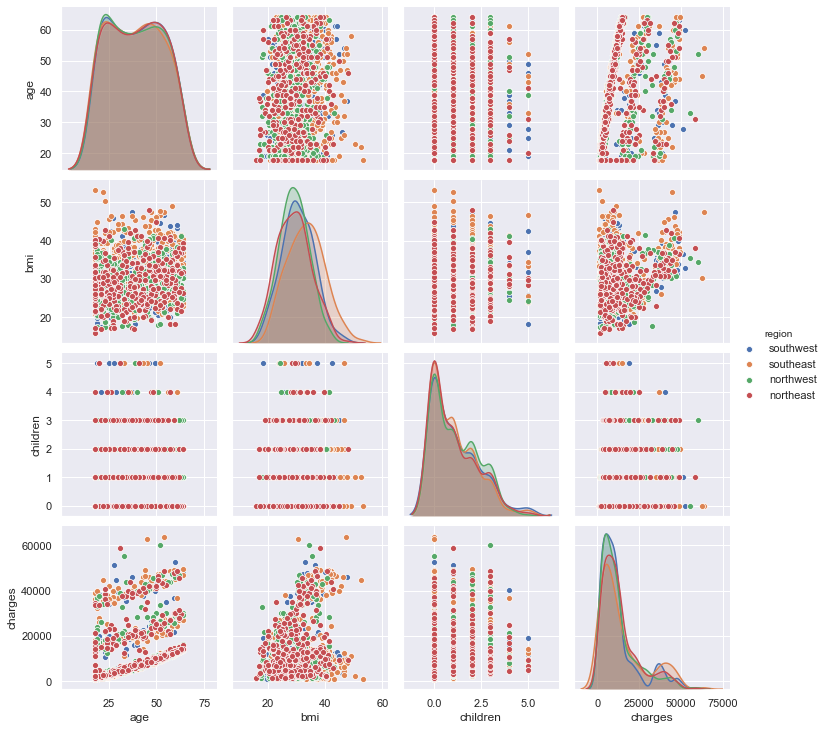

In [25]:
sns.pairplot(insuranceDataFrame,hue='region')

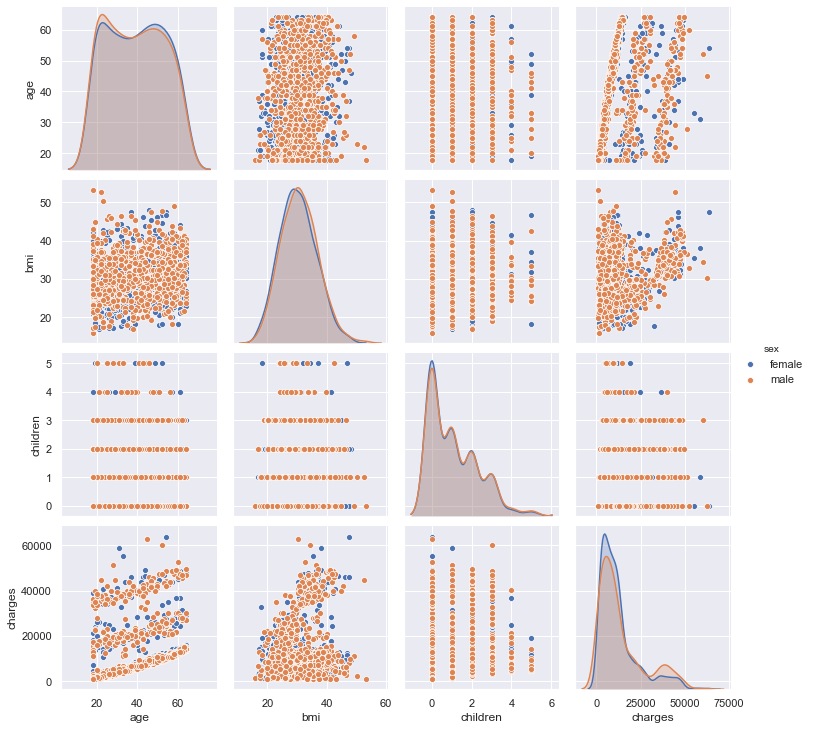

In [26]:
sns.pairplot(insuranceDataFrame,hue='sex')

In [27]:
# Converting category to numerical
insuranceDataFrame_o['region']= insuranceDataFrame_o['region'].astype('category').cat.codes
insuranceDataFrame_o['smoker']= insuranceDataFrame_o['smoker'].astype('category').cat.codes
insuranceDataFrame_o['sex'] = insuranceDataFrame_o['sex'].astype('category').cat.codes
# sns.pairplot(insuranceDataFrame_o)

with the above 3 pair plot we will be a to see the variance and relation between the attributes 

### Use data visualization to plot correlation matrix.	

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.004636  0.141368 -0.263688 -0.358362  0.001398  0.541579
sex       0.004636  1.000000 -0.003050  0.008345  0.021677 -0.040379 -0.042065
bmi       0.141368 -0.003050  1.000000 -0.035962 -0.210717  0.137659 -0.021856
children -0.263688  0.008345 -0.035962  1.000000 -0.136739  0.016724 -0.172272
smoker   -0.358362  0.021677 -0.210717 -0.136739  1.000000 -0.060817  0.331211
region    0.001398 -0.040379  0.137659  0.016724 -0.060817  1.000000 -0.115854
charges   0.541579 -0.042065 -0.021856 -0.172272  0.331211 -0.115854  1.000000


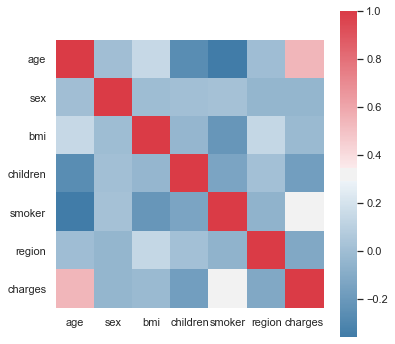

In [28]:
corr = insuranceDataFrame_o.corr()
print(corr)
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),square=True)

with this heat map Correlation of attribute is clearly seen that there is a strong corelation in smoking and not much with others 

## 4. Answer the following questions with statistical evidence (28 marks)

### a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

In [29]:
insuranceDataFrameDf = insuranceDataFrame.copy()
insuranceDataFrameDf['region']= insuranceDataFrameDf['region'].astype('category').cat.codes
insuranceDataFrameDf['smoker']= insuranceDataFrameDf['smoker'].astype('category').cat.codes
insuranceDataFrameDf['sex'] = insuranceDataFrameDf['sex'].astype('category').cat.codes
insuranceDataFrame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Now formulate the Null ( 𝐻0 ) and alternate ( 𝐻𝑎 ) hypothesis
    Null hypothesis( 𝐻0 )  = "charges has no effect on smoking"
    alternate hypothesis( 𝐻𝑎 ) = "charges has effect on smoking" 
    
level of significance from the problem statement ( 𝛼 ) = 5%

In [30]:
alpha_value =0.05

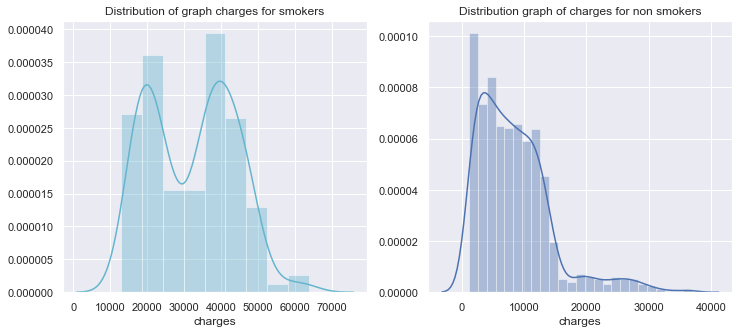

In [31]:
f= plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
ax.set_title('Distribution of graph charges for smokers')
non_smokers = (insuranceDataFrameDf['smoker'] == 1)
smokers = (insuranceDataFrameDf['smoker'] == 0)
sns.distplot(insuranceDataFrameDf[non_smokers]["charges"],color='c',ax=ax)
ax=f.add_subplot(122)
ax.set_title('Distribution graph of charges for non smokers')
sns.distplot(insuranceDataFrameDf[smokers]['charges'],color='b',ax=ax)

whith the graph above Smoking patients spend more on treatment. but that is not enough to prove to lets do  t-test 

In [32]:
t,p_value = stats.ttest_ind(non_smokers,smokers,axis =0)
if p_value < alpha_value:
    print("charges has effect on smoking(reject H0)")
else:
    print("charges has no effect on smoking(accept H0)")

charges has effect on smoking(reject H0)


#### Conclusion 
 with the p_value got from indipendent ttest we can conclude that charges has effect on smoking and hence we can reject Null ( 𝐻0 ) hypothesis

### b. Does bmi of males differ significantly from that of females? (7 marks)

#### Now formulate the Null ( 𝐻0 ) and alternate ( 𝐻𝑎 ) hypothesis
    Null hypothesis( 𝐻0 )  = "bmi has no effect on gender"
    alternate hypothesis( 𝐻𝑎 ) = "bmi has effect on gender" 
    
level of significance from the problem statement ( 𝛼 ) = 5%

In [33]:
# female = 0 , male =1 
male_bmi = insuranceDataFrameDf[insuranceDataFrameDf['sex'] == 1]['bmi']
female_bmi = insuranceDataFrameDf[insuranceDataFrameDf['sex'] == 0]['bmi']

t , p_value = stats.ttest_ind(male_bmi,female_bmi,axis =0) 
print(p_value)

if p_value < alpha_value:
    print("bmi has effect on gender(reject H0)")
else:
    print("bmi has no effect on gender(accept H0)")

0.08997637178984932
bmi has no effect on gender(accept H0)


#### Conclusion
with the p_value from the indepentent t-test we can conclude that bmi has no effect on gender and hence we accept the Null ( 𝐻0 ) hypothesis

### c. Is the proportion of smokers significantly different in different genders? (7 marks)

sex     female  male
smoker              
no         547   517
yes        115   159


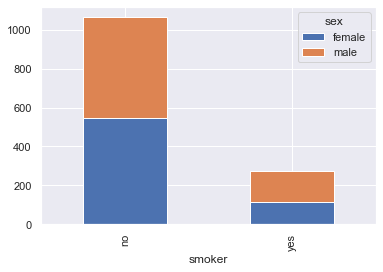

In [34]:
# female = 0, male =1
crossTab = pd.crosstab(insuranceDataFrame['smoker'],insuranceDataFrame['sex'])
print(crossTab)
crossTab.plot.bar(stacked=True)

with the graph and data we can say that there is a significant difference in different genders lets do Chi-Squared test for hypothesis testing 

#### Now formulate the Null ( 𝐻0 ) and alternate ( 𝐻𝑎 ) hypothesis
    Null hypothesis( 𝐻0 )  = "There is no difference in proportion"
    alternate hypothesis( 𝐻𝑎 ) = "There is  difference in proportion" 
    
level of significance from the problem statement ( 𝛼 ) = 5%

In [35]:
c_value = 3.84
chi_statistic, p, dof, expected = stats.chi2_contingency(crossTab)
if chi_statistic < c_value:
    print("There is no difference in proportion with gender")
else :
    print("There is  difference in proportion with gender")


There is  difference in proportion with gender


#### Conclusion 
so we notice the chi stats is less than the Critical Value so we can conclude that there is a difference in propotation of smoking with gender and hence we reject the Null ( 𝐻0 ) hypothesis

### d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

#### Now formulate the Null ( 𝐻0 ) and alternate ( 𝐻𝑎 ) hypothesis
    Null hypothesis( 𝐻0 )  = "The distribution of bmi is not same"
    alternate hypothesis( 𝐻𝑎 ) = "The distribution of bmi is same" 
    
level of significance from the problem statement ( 𝛼 ) = 5%

In [36]:
# female=0, male =1 
bmiDf= insuranceDataFrameDf[(insuranceDataFrameDf['children']<=2) & (insuranceDataFrameDf['sex']==0)]

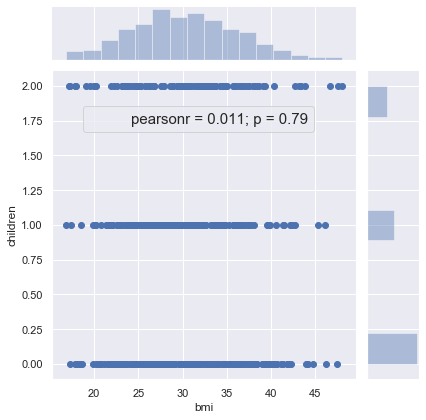

In [37]:
sns.jointplot(bmiDf['bmi'],bmiDf['children']).annotate(stats.pearsonr, fontsize=15, loc=(0.1, 0.8))

#### Conclusion
from the above Graph the P_value(0.79) is less than the alpa_value so we can conclude that distribution of bmi across women with no children,1 child and 2 children is same and hence we reject the Null ( 𝐻0 ) hypothesis